In [10]:
import pandas as pd

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sc
from scipy import constants
#%matplotlib widget

import itertools as iter
import sympy as sy

# Álgebra Lineal Simbólica

In [151]:
def Malus_Law_Retarder(polarization, retarder_angle, retarder_phase):
	from sympy import I
	alpha, beta, theta, s = sy.symbols('alpha, beta, theta, s', real=True)
	#alpha: ángulo del eje rápido del retardador respecto a la horizontal.
	#beta: ángulo del eje de transmisión del polarizador respecto a la horizontal.
	#theta: polarización lineal del campo eléctrico.
	#s: kz - wt, introducido para hacer promedios como <cos^2(s)> = 1/2.
	
	linear_E = sy.Matrix([sy.cos(theta), sy.sin(theta)])
	
	rotation = sy.Matrix([
		[sy.sin(alpha), sy.cos(alpha)],
		[-sy.cos(alpha), sy.sin(alpha)]
	])
	
	retarder = sy.diag(1, sy.exp(I*retarder_phase))
	
	polarizer = sy.Matrix([
		[(sy.sin(beta-alpha))**2, -sy.sin(beta-alpha)*sy.cos(beta-alpha)],
		[-sy.sin(beta-alpha)*sy.cos(beta-alpha), (sy.cos(beta-alpha))**2]
	])

	transformed_E = sy.simplify(polarizer*retarder*(rotation**(-1))*linear_E)
	display(transformed_E)

	transformed_E *= sy.exp(I*s)
	

	norm_real_E = (sy.re(transformed_E[0])**2 + sy.re(transformed_E[1])**2)
	average_norm_E = (norm_real_E.expand()).subs([((sy.cos(s))**2, 1/2), ((sy.sin(s))**2, 1/2), ((sy.sin(s)), 0)])

	sym_returned_E = sy.simplify(average_norm_E)
	display(sym_returned_E)
	returned_E = sym_returned_E.subs([(alpha, retarder_angle), (theta, polarization)])
	return sy.lambdify(beta, 2*returned_E, 'numpy')

In [147]:
Malus_Law_Retarder(angulo_max2, 0, 0)

Matrix([
[(sin(alpha - beta + theta) - sin(3*alpha - beta + theta))*sin(alpha - beta)/(2*sin(alpha))],
[(sin(alpha - beta + theta) - sin(3*alpha - beta + theta))*cos(alpha - beta)/(2*sin(alpha))]])

0.125*(-sin(alpha - beta + theta) + sin(3*alpha - beta + theta))**2/sin(alpha)**2

<function _lambdifygenerated(beta)>

In [490]:
Malus_Law_Retarder_1 = sy.lambdify(beta, Malus_Law_Retarder(angulo_max2, sy.pi/6, sy.pi), 'numpy')

# Gráficas

In [3]:
datos_polarizacion_PATH = '/Users/GLaDOS_1/Documents/GitHub/Proyectos/Lab Optica/Practica 7/Datos.xlsx'
with pd.ExcelFile(datos_polarizacion_PATH) as tabla_datos:
	#Extrae los datos del archivo de Excel a un diccionario de dataframes, eliminando la columna de 'líneas'
	#y convirtiendo los ángulos de grados a radianes.
	mediciones = tabla_datos.parse(sheet_name=[0, 1, 2, 3], usecols=[1, 2, 3], converters={'Ángulo': np.radians})

In [5]:
sorted_mediciones = mediciones[0].sort_values(by='Intensidad Min', ascending=False)
second_max = sorted_mediciones

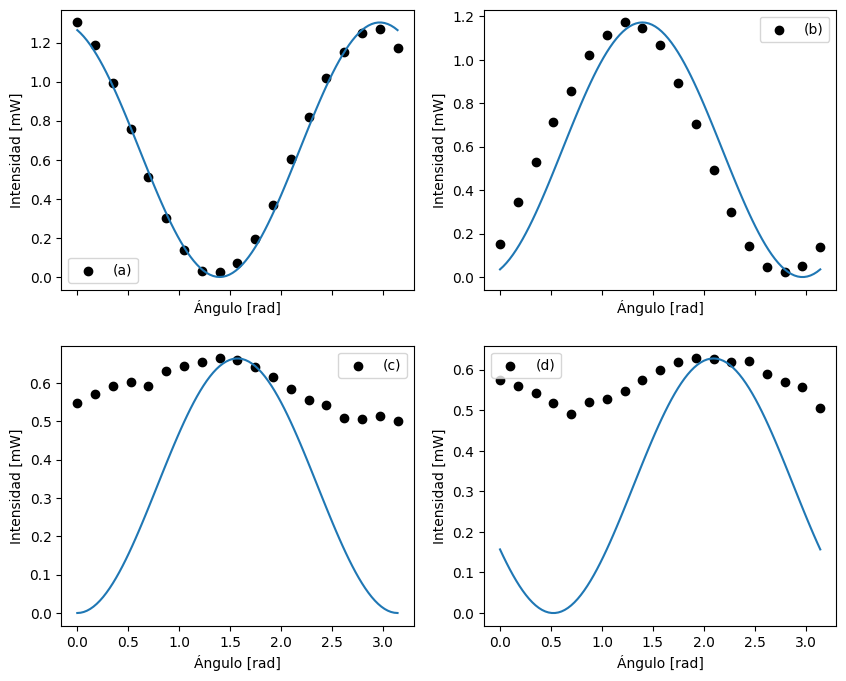

In [6]:
angulos = np.linspace(0, mediciones[0]['Ángulo'].max(), 100)
Malus_Ley = lambda intensidades, angulo: intensidades.max() * np.cos(angulo)**2

fig, axs = plt.subplots(figsize=(10,8), nrows=2, ncols=2, sharex=True)
captions = ['({})'.format(label) for label in ['a', 'b', 'c', 'd']]
#print(captions)

figure_positions = iter.product(range(2), repeat=2)
for index, position in enumerate(figure_positions):
	figure = axs[position]
	figure.set(xlabel='Ángulo [rad]', ylabel='Intensidad [mW]')
	#figure.grid()

	
	plotted_data = mediciones[index]
	intensidad_max_2 = plotted_data['Intensidad Max'].nlargest(2).iloc[1]
	fase = plotted_data[plotted_data['Intensidad Max'] == intensidad_max_2].iloc[0, 0]
	x = (plotted_data['Ángulo'])
	average_y = (plotted_data['Intensidad Min'] + plotted_data['Intensidad Max'])/2
	#y_error = plotted_data['Intensidad Max'] - average_y
	
	figure.scatter(x, average_y, color='k', label=captions[index])
	figure.plot(angulos, Malus_Ley(average_y, angulos - fase))
	figure.legend()
	#figure.plot(x, Malus_Ley(average_y, x))

plt.savefig('Intensidades.pdf', dpi=300)

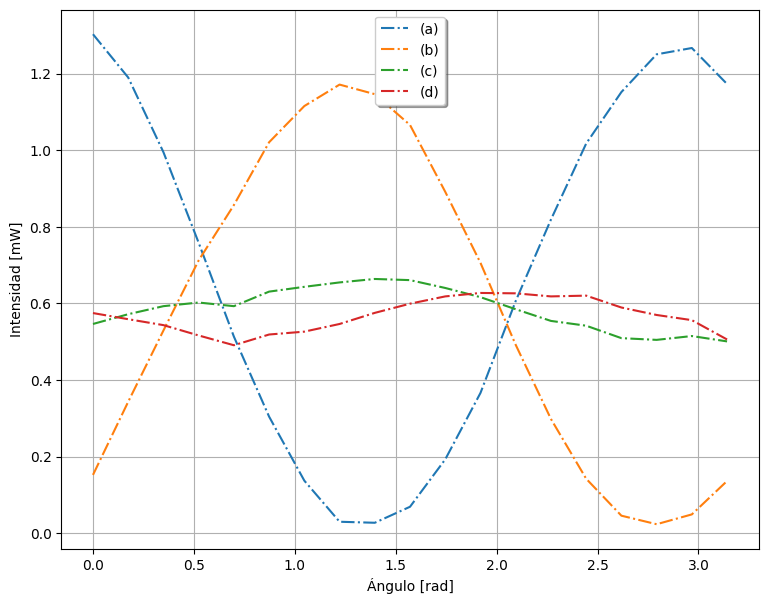

In [7]:
fig, ax = plt.subplots(figsize=(9,7))
ax.set(xlabel='Ángulo [rad]', ylabel='Intensidad [mW]')
ax.grid()

plots = []

figure_positions = iter.product(range(2), repeat=2)
for index, position in enumerate(figure_positions):
	figure = ax

	plotted_data = mediciones[index]
	intensidad_max_2 = plotted_data['Intensidad Max'].nlargest(2).iloc[1]
	
	x = (plotted_data['Ángulo'])
	average_y = (plotted_data['Intensidad Min'] + plotted_data['Intensidad Max'])/2
	
	plot, = figure.plot(x, average_y, '-.')
	plots.append(plot)

ax.legend(
	plots, ('({})'.format(label) for label in ['a', 'b', 'c', 'd']),
	shadow=True, fancybox=True
)

plt.savefig('Intensidades2.pdf', dpi=300)

Matrix([
[sin(alpha - beta)*cos(beta - theta)],
[cos(alpha - beta)*cos(beta - theta)]])

0.5*cos(beta - theta)**2

Polarizacion: 2.9670597283903604 170.0
Error cuadrático medio: 0.0021066527620356664


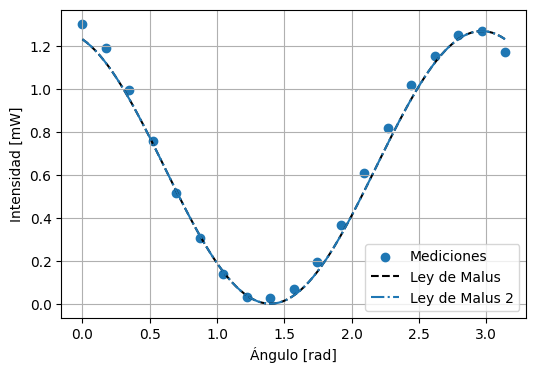

In [152]:
fig1, ax1 = plt.subplots(figsize=(6,4))
ax1.set(xlabel='Ángulo [rad]', ylabel='Intensidad [mW]')
ax1.grid()

figure = ax1

plotted_data1 = mediciones[0]
sorted_data1 = plotted_data1.sort_values(by='Intensidad Min', ascending=False).iloc[1]
angulo_max1 = sorted_data1['Ángulo']
intensidad_max1 = sorted_data1['Intensidad Max']

x1 = (plotted_data1['Ángulo'])
average_y1 = (plotted_data1['Intensidad Min'] + plotted_data1['Intensidad Max'])/2
Malus_Law_Retarder_0 = Malus_Law_Retarder(angulo_max1, sy.pi/2, 0)

figure.scatter(x1, average_y1, label='Mediciones')
figure.plot(angulos, Malus_Ley(intensidad_max1, angulos-angulo_max1), 'k--', label= 'Ley de Malus')
figure.plot(angulos, intensidad_max1*Malus_Law_Retarder_0(angulos), '-.', label= 'Ley de Malus 2')
ax1.legend()

MSE1 = (1/average_y1.size)*np.sum((average_y1-Malus_Ley(intensidad_max1, x1-angulo_max1))**2)
print('Polarizacion:', angulo_max1, np.degrees(angulo_max1))
print('Error cuadrático medio:', MSE1)

plt.savefig('Intensidad1.pdf', dpi=300)

70.0


Matrix([
[(sin(-3*alpha + beta + theta) - sin(-alpha + beta + theta))*sin(alpha - beta)/(2*sin(alpha))],
[(sin(-3*alpha + beta + theta) - sin(-alpha + beta + theta))*cos(alpha - beta)/(2*sin(alpha))]])

0.125*(sin(-3*alpha + beta + theta) - sin(-alpha + beta + theta))**2/sin(alpha)**2

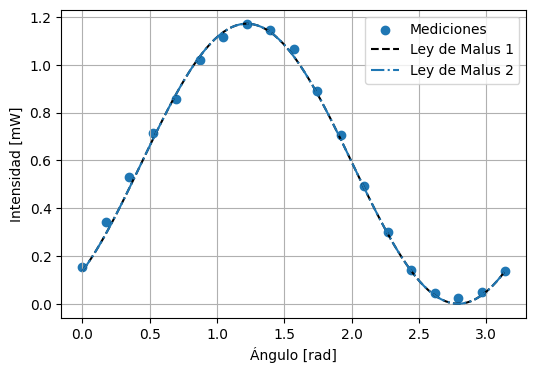

In [162]:

fig2, ax2 = plt.subplots(figsize=(6,4))
ax2.set(xlabel='Ángulo [rad]', ylabel='Intensidad [mW]')
ax2.grid()

figure = ax2

plotted_data2 = mediciones[1]
sorted_data2 = plotted_data2.sort_values(by='Intensidad Min', ascending=False).iloc[0]
angulo_max2 = sorted_data2['Ángulo']
print(np.degrees(angulo_max2))
intensidad_max2 = sorted_data2['Intensidad Max']

x2 = (plotted_data2['Ángulo'])
average_y2 = (plotted_data2['Intensidad Min'] + plotted_data2['Intensidad Max'])/2

Malus_Law_Retarder_1 = Malus_Law_Retarder(angulo_max1, sy.pi/6, sy.pi)

figure.scatter(x2, average_y2, label='Mediciones')
figure.plot(angulos, Malus_Ley(intensidad_max2, angulos-angulo_max2), 'k--', label= 'Ley de Malus 1')
figure.plot(angulos, intensidad_max2*Malus_Law_Retarder_1(angulos), '-.', label= 'Ley de Malus 2')

ax2.legend()

#plt.savefig('Intensidad2.pdf', dpi=300)

Matrix([
[  (1 - I)*((1 + I)*cos(theta) - (1 + I)*cos(2*alpha - theta) + I*cos(2*beta - theta) + cos(-4*alpha + 2*beta + theta) - cos(-2*alpha + 2*beta + theta) - I*cos(2*alpha - 2*beta + theta))/(8*sin(alpha))],
[(1 - I)*((-1 + I)*sin(theta) + (-1 + I)*sin(2*alpha - theta) + I*sin(2*beta - theta) + sin(-4*alpha + 2*beta + theta) - sin(-2*alpha + 2*beta + theta) + I*sin(2*alpha - 2*beta + theta))/(8*sin(alpha))]])

0.0625*(1 - cos(2*alpha))**2*cos(2*beta - 2*theta) + 0.0625*(1 - cos(2*alpha))**2*cos(2*beta + 2*theta) + 0.03125*(1 - cos(2*beta))**2*cos(2*theta) + 0.03125*(1 - cos(2*beta))**2 + 0.0625*cos(2*beta) - 0.015625*cos(4*beta)*cos(2*theta) - 0.015625*cos(4*beta) - 0.046875*cos(2*theta) + 0.0625*cos(2*beta - 2*theta) - 0.0625*cos(2*beta + 2*theta) + 0.109375*cos(-4*alpha + 2*beta + 2*theta) + 0.0625*cos(-2*alpha + 2*beta + 2*theta) + 0.0625*cos(2*alpha - 2*beta + 2*theta) + 0.0625*cos(2*alpha + 2*beta - 2*theta) + 0.0625*cos(2*alpha + 2*beta + 2*theta) - 0.015625*cos(4*alpha - 2*beta + 2*theta) - 0.015625*cos(4*alpha + 2*beta - 2*theta) - 0.015625*cos(4*alpha + 2*beta + 2*theta) + 0.203125 - 0.03125*(1 - cos(2*beta))**2*cos(2*theta)/(1 - cos(2*alpha)) - 0.03125*(1 - cos(2*beta))**2/(1 - cos(2*alpha)) - 0.0625*cos(2*beta)/(1 - cos(2*alpha)) + 0.015625*cos(4*beta)*cos(2*theta)/(1 - cos(2*alpha)) + 0.015625*cos(4*beta)/(1 - cos(2*alpha)) + 0.046875*cos(2*theta)/(1 - cos(2*alpha)) - 0.03125*cos

Error cuadrático medio: 0.025084093722956693


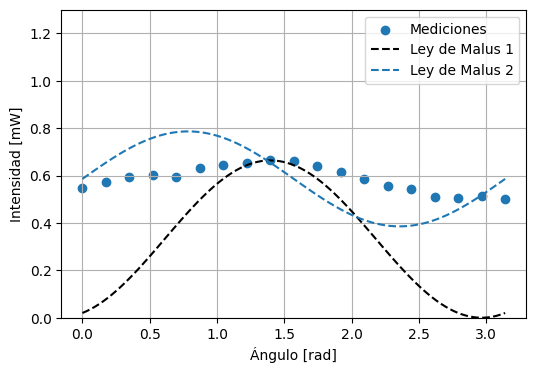

In [163]:
fig3, ax3 = plt.subplots(figsize=(6,4))
ax3.set(xlabel='Ángulo [rad]', ylabel='Intensidad [mW]', ylim=(0, 1.3))
ax3.grid()

figure = ax3

plotted_data3 = mediciones[2]
sorted_data3 = plotted_data3.sort_values(by='Intensidad Min', ascending=False).iloc[0]
angulo_max3 = sorted_data3['Ángulo']
intensidad_max3 = sorted_data3['Intensidad Max']

x3 = (plotted_data3['Ángulo'])
average_y3 = (plotted_data3['Intensidad Min'] + plotted_data3['Intensidad Max'])/2

Malus_Law_Retarder_2 = Malus_Law_Retarder(angulo_max3, sy.pi/4, sy.pi/2)

figure.scatter(x3, average_y3, label='Mediciones')
figure.plot(angulos, Malus_Ley(intensidad_max3, angulos-angulo_max3), 'k--', label= 'Ley de Malus 1')
figure.plot(angulos, intensidad_max2*Malus_Law_Retarder_2(angulos), '--', label= 'Ley de Malus 2')
ax3.legend()

MSE3 = (1/average_y3.size)*np.sum((average_y3- intensidad_max2*Malus_Law_Retarder_2(x3-angulo_max3))**2)
print('Error cuadrático medio:', MSE3)

plt.savefig('Intensidad3.pdf', dpi=300)

Matrix([
[  (1 - I)*((1 + I)*cos(theta) - (1 + I)*cos(2*alpha - theta) + I*cos(2*beta - theta) + cos(-4*alpha + 2*beta + theta) - cos(-2*alpha + 2*beta + theta) - I*cos(2*alpha - 2*beta + theta))/(8*sin(alpha))],
[(1 - I)*((-1 + I)*sin(theta) + (-1 + I)*sin(2*alpha - theta) + I*sin(2*beta - theta) + sin(-4*alpha + 2*beta + theta) - sin(-2*alpha + 2*beta + theta) + I*sin(2*alpha - 2*beta + theta))/(8*sin(alpha))]])

0.0625*(1 - cos(2*alpha))**2*cos(2*beta - 2*theta) + 0.0625*(1 - cos(2*alpha))**2*cos(2*beta + 2*theta) + 0.03125*(1 - cos(2*beta))**2*cos(2*theta) + 0.03125*(1 - cos(2*beta))**2 + 0.0625*cos(2*beta) - 0.015625*cos(4*beta)*cos(2*theta) - 0.015625*cos(4*beta) - 0.046875*cos(2*theta) + 0.0625*cos(2*beta - 2*theta) - 0.0625*cos(2*beta + 2*theta) + 0.109375*cos(-4*alpha + 2*beta + 2*theta) + 0.0625*cos(-2*alpha + 2*beta + 2*theta) + 0.0625*cos(2*alpha - 2*beta + 2*theta) + 0.0625*cos(2*alpha + 2*beta - 2*theta) + 0.0625*cos(2*alpha + 2*beta + 2*theta) - 0.015625*cos(4*alpha - 2*beta + 2*theta) - 0.015625*cos(4*alpha + 2*beta - 2*theta) - 0.015625*cos(4*alpha + 2*beta + 2*theta) + 0.203125 - 0.03125*(1 - cos(2*beta))**2*cos(2*theta)/(1 - cos(2*alpha)) - 0.03125*(1 - cos(2*beta))**2/(1 - cos(2*alpha)) - 0.0625*cos(2*beta)/(1 - cos(2*alpha)) + 0.015625*cos(4*beta)*cos(2*theta)/(1 - cos(2*alpha)) + 0.015625*cos(4*beta)/(1 - cos(2*alpha)) + 0.046875*cos(2*theta)/(1 - cos(2*alpha)) - 0.03125*cos

Error cuadrático medio: 0.0680286592950829


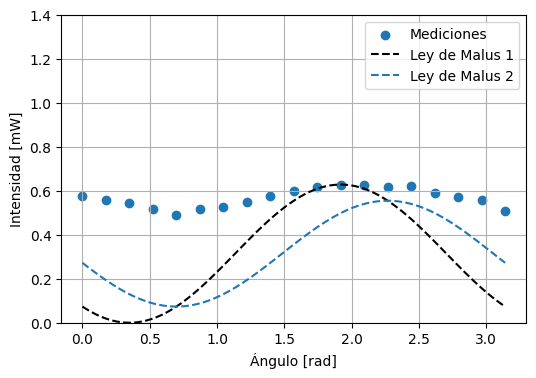

In [166]:
fig4, ax4 = plt.subplots(figsize=(6,4))
ax4.set(xlabel='Ángulo [rad]', ylabel='Intensidad [mW]', ylim=(0, 1.4))
ax4.grid()

figure = ax4

plotted_data4 = mediciones[3]
sorted_data4 = plotted_data4.sort_values(by='Intensidad Min', ascending=False).iloc[0]
angulo_max4 = sorted_data4['Ángulo']
intensidad_max4 = sorted_data4['Intensidad Max']

x4 = (plotted_data4['Ángulo'])
average_y4 = (plotted_data4['Intensidad Min'] + plotted_data4['Intensidad Max'])/2

Malus_Law_Retarder_3 = Malus_Law_Retarder(angulo_max4, np.radians(-50), sy.pi/2)

figure.scatter(x4, average_y4, label='Mediciones')
figure.plot(angulos, Malus_Ley(intensidad_max4, angulos-angulo_max4), 'k--', label= 'Ley de Malus 1')
figure.plot(angulos, intensidad_max4*Malus_Law_Retarder_3(angulos), '--', label= 'Ley de Malus 2')
ax4.legend()

MSE4 = (1/average_y4.size)*np.sum((average_y4- intensidad_max4*Malus_Law_Retarder_2(x4-angulo_max2))**2)
print('Error cuadrático medio:', MSE4)

plt.savefig('Intensidad4.pdf', dpi=400)